In [2]:
import sklearn
import pandas as pd
import numpy as np
from causalml.inference.meta import BaseSRegressor, BaseRRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Open the sets
train_df = pd.read_parquet('train.parquet')
test_df = pd.read_parquet('test.parquet')
val_df = pd.read_parquet('val.parquet')

In [5]:
train_df.head(20)

,index,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,customer_segment,enrollments_year,enrollments_month,education_Graduate,education_Post Graduate,education_Pre Graduate,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,target
0,-0.207463,-0.240787,1.275151,-0.816879,-0.932068,-0.189880,0.962929,0.642506,1.762901,1.641165,1.897860,0.826431,1.061872,1.372483,0.984974,-0.548894,-0.091434,0.379408,-1.501538,0.731531,0.839254,-0.795822,-0.161796,-0.342936,-0.770387,1.918488,-0.608793,-0.199469,1
1,1.609546,0.009525,0.673146,-0.816879,0.883439,1.616874,0.653776,0.434425,-0.137033,0.387710,0.243415,-0.359416,1.269344,-0.402377,0.069841,0.264205,-0.091434,1.631852,1.390860,0.161715,0.839254,-0.795822,-0.161796,-0.342936,1.298049,-0.521244,-0.608793,-0.199469,0
2,-0.344361,1.678275,1.001970,-0.816879,-0.932068,-0.328861,1.087929,0.955858,1.314018,-1.500037,0.918345,0.147863,-0.159096,1.004166,1.900106,-1.768543,-0.091434,0.379408,1.390860,-0.408102,-1.191534,1.256562,-0.161796,-0.342936,-0.770387,-0.521244,1.642593,-0.199469,0
3,-0.863951,-1.158600,0.657179,-0.816879,0.883439,-0.850041,0.980851,-1.396400,0.098573,-1.500037,-0.108094,0.203056,1.454935,0.485053,0.679929,0.264205,-0.091434,1.631852,1.390860,1.016439,0.839254,-0.795822,-0.161796,-0.342936,1.298049,-0.521244,-0.608793,-0.199469,0
4,1.166183,-0.240787,-0.131787,2.944841,0.883439,1.165186,-0.952175,-0.957345,-0.388174,-0.344177,-0.543477,0.203056,-0.665843,-1.289807,-0.540247,0.264205,-0.091434,-1.499259,-0.055339,1.301348,0.839254,-0.795822,-0.161796,-0.342936,-0.770387,-0.521244,1.642593,-0.199469,0
5,1.261079,-1.492350,0.895580,-0.816879,2.698945,1.269422,0.968366,1.467800,1.364768,1.800689,1.526721,1.218599,1.454935,1.201524,0.679929,-0.142344,-0.091434,-0.873037,1.390860,-0.408102,-1.191534,1.256562,-0.161796,-0.342936,-0.770387,-0.521244,-0.608793,5.013316,0
6,-0.107901,0.510150,1.083373,-0.816879,-0.932068,-0.085644,1.379272,0.532067,1.469112,1.110242,1.178114,0.175952,0.555124,1.372483,0.984974,-1.361993,-0.091434,0.379408,-0.055339,-0.693010,-1.191534,1.256562,-0.161796,-0.342936,-0.770387,1.918488,-0.608793,-0.199469,0
7,-0.512372,0.176400,0.348028,-0.816879,0.883439,-0.537333,0.440658,1.257419,0.634299,0.835446,1.042997,0.175952,1.061872,0.485053,0.374885,0.264205,-0.091434,-0.873037,-1.501538,1.301348,0.839254,-0.795822,-0.161796,2.915996,-0.770387,-0.521244,-0.608793,-0.199469,0
8,1.397977,-0.908287,0.909922,-0.816879,-0.932068,1.408403,1.026524,0.177594,1.185651,1.072395,-1.414243,-2.397752,-0.665843,1.891597,-0.540247,-1.768543,-0.091434,0.379408,1.390860,-1.547735,-1.191534,1.256562,-0.161796,-0.342936,-0.770387,-0.521244,1.642593,-0.199469,0
9,1.721554,0.343275,1.028202,-0.816879,0.883439,1.721110,0.612438,0.177594,1.034935,0.594602,0.655955,0.348302,1.454935,0.485053,-0.235203,-0.548894,-0.091434,-0.873037,-0.055339,0.731531,0.839254,-0.795822,-0.161796,2.915996,-0.770387,-0.521244,-0.608793,-0.199469,0


In [6]:
#get the statistics of the data
train_df.describe()

,index,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,customer_segment,enrollments_year,enrollments_month,education_Graduate,education_Post Graduate,education_Pre Graduate,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,target
count,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1568.000000
mean,7.703588e-17,-4.010397e-16,5.040186e-15,-8.043453e-17,7.477012e-17,-4.078370e-17,2.730242e-16,9.289621e-17,2.707585e-16,-5.494471e-17,2.673598e-16,3.545916e-16,1.495402e-16,-4.304946e-17,9.176333e-17,-1.064908e-16,2.265761e-17,-9.516197e-17,5.365323e-14,-9.969350e-17,-7.250436e-17,2.379049e-17,-6.344132e-17,-6.230844e-18,-6.797284e-17,4.531523e-18,-5.097963e-18,3.738506e-17,0.146046
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,0.353265
min,-1.753788e+00,-6.331725e+00,-6.407705e+00,-8.168786e-01,-9.320683e-01,-1.718673e+00,-2.579992e+00,-1.396400e+00,-2.609500e+00,-1.500037e+00,-1.414243e+00,-2.397752e+00,-2.601031e+00,-1.289807e+00,-1.760424e+00,-2.175093e+00,-9.143374e-02,-1.499259e+00,-1.501538e+00,-1.547735e+00,-1.191534e+00,-7.958224e-01,-1.617962e-01,-3.429360e-01,-7.703869e-01,-5.212438e-01,-6.087934e-01,-1.994688e-01,0.000000
25%,-8.480056e-01,-7.414124e-01,-5.302019e-01,-8.168786e-01,-9.320683e-01,-8.500407e-01,-8.230221e-01,-9.573451e-01,-8.480789e-01,-8.474670e-01,-9.788598e-01,-7.006757e-01,-6.658430e-01,-1.289807e+00,-8.452913e-01,-5.488939e-01,-9.143374e-02,-8.730369e-01,-5.533925e-02,-9.779186e-01,-1.191534e+00,-7.958224e-01,-1.617962e-01,-3.429360e-01,-7.703869e-01,-5.212438e-01,-6.087934e-01,-1.994688e-01,0.000000
50%,1.110689e-02,9.296257e-02,1.931920e-01,-8.168786e-01,-9.320683e-01,1.859139e-02,2.721639e-01,-4.193291e-02,6.173426e-02,2.352920e-02,-3.411111e-02,8.842001e-02,2.339679e-01,1.167362e-01,-2.352030e-01,2.642054e-01,-9.143374e-02,-2.468146e-01,-5.533925e-02,-1.231938e-01,8.392543e-01,-7.958224e-01,-1.617962e-01,-3.429360e-01,-7.703869e-01,-5.212438e-01,-6.087934e-01,-1.994688e-01,0.000000
75%,8.554406e-01,6.770251e-01,7.421726e-01,1.063981e+00,8.834386e-01,8.524782e-01,8.666683e-01,8.037458e-01,8.514863e-01,8.383298e-01,8.007525e-01,7.113201e-01,8.266583e-01,7.707417e-01,6.799294e-01,6.707551e-01,-9.143374e-02,1.005630e+00,1.390860e+00,1.016439e+00,8.392543e-01,1.256562e+00,-1.617962e-01,-3.429360e-01,1.298049e+00,-5.212438e-01,1.642593e+00,-1.994688e-01,0.000000
max,1.729332e+00,2.262338e+00,2.433504e+00,2.944841e+00,2.698945e+00,1.721110e+00,1.460867e+00,1.959670e+00,2.125735e+00,1.802978e+00,2.088150e+00,2.154924e+00,3.268593e+00,3.021312e+00,2.205150e+00,5.955901e+00,1.093688e+01,1.631852e+00,1.390860e+00,1.586256e+00,8.392543e-01,1.256562e+00,6.180615e+00,2.915996e+00,1.298049e+00,1.918488e+00,1.642593e+00,5.013316e+00,1.000000


In [8]:
# combine the sets into a whole df
df = pd.concat([train_df, test_df, val_df])

In [10]:
df.columns

Index(['index', 'year_birth', 'income', 'kidhome', 'teenhome', 'recency',
       'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'complain', 'customer_segment', 'enrollments_year', 'enrollments_month',
       'education_Graduate', 'education_Post Graduate',
       'education_Pre Graduate', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Together', 'marital_status_Widow', 'target'],
      dtype='object')

In [11]:
#  Define the target variables to loop through
target_vars = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 
               'mntsweetproducts', 'mntgoldprods']

# create results tables
results = []

# define the control variables
controls = ['year_birth', 'income', 'kidhome', 'teenhome', 'recency','numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'complain', 'customer_segment', 'enrollments_year', 'enrollments_month',
       'education_Graduate', 'education_Post Graduate',
       'education_Pre Graduate', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Together', 'marital_status_Widow']

#loop through the target variables
for target in target_vars:
    # Prepare the data
    print(f"Processing {target}")
    Y = df[target]
    X = df[controls + target_vars].drop(target, axis=1)
    T = df['target']

    # Train a logistic regression model for propensity score estimation
    propensity_model = LogisticRegression(max_iter=500) 
    propensity_model.fit(X, T)

    # Get propensity scores (probabilities)
    propensity_score = propensity_model.predict_proba(X)[:, 1]

    # Define and fit the causal model using lgbm
    lgbm = lgb.LGBMRegressor(objective='regression')
    r_learner = BaseRRegressor(learner=lgbm)

    # Estimate the average treatment effect 
    te, lb, ub =  r_learner.estimate_ate(X = X, treatment = T, y = Y, p = propensity_score)
    rl_tau = r_learner.fit_predict(X = X, treatment = T, y = Y, p = propensity_score) 
    
    # Collect the results into a dictionary
    result = {
        'target var': target,
        'ate': te[0],
        'lb': lb[0],
        'ub': ub[0],
        'tau': rl_tau,
        'r_learner': r_learner
    }

    # Append the result to the results list
    results.append(result)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

results_df.head(10)

Processing mntwines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 26
[LightGBM] [Info] Start training from score -0.003178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 26
[LightGBM] [Info] Start training from score 0.002953
Processing mntfruits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_row_wise=true` to remove 

,target var,ate,lb,ub,tau,r_learner
0,mntwines,-0.102320,-0.103268,-0.101371,"[[-0.2890707928350173], [0.25687310437890787],...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
1,mntfruits,-0.127010,-0.128672,-0.125348,"[[-1.2287395379574382], [-0.029015416280596843...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
2,mntmeatproducts,-0.014361,-0.015346,-0.013375,"[[1.5075976280513788], [-0.22597356482934736],...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
3,mntfishproducts,-0.102216,-0.104027,-0.100405,"[[0.5462209416201598], [0.8319786239438376], [...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
4,mntsweetproducts,0.024225,0.022447,0.026002,"[[1.0663724668212586], [-0.6137347165519988], ...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
5,mntgoldprods,0.145322,0.143424,0.147220,"[[-0.28747882307337574], [0.6476268900945469],...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...


In [13]:
results_df

,target var,ate,lb,ub,tau,r_learner
0,mntwines,-0.102320,-0.103268,-0.101371,"[[-0.2890707928350173], [0.25687310437890787],...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
1,mntfruits,-0.127010,-0.128672,-0.125348,"[[-1.2287395379574382], [-0.029015416280596843...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
2,mntmeatproducts,-0.014361,-0.015346,-0.013375,"[[1.5075976280513788], [-0.22597356482934736],...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
3,mntfishproducts,-0.102216,-0.104027,-0.100405,"[[0.5462209416201598], [0.8319786239438376], [...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
4,mntsweetproducts,0.024225,0.022447,0.026002,"[[1.0663724668212586], [-0.6137347165519988], ...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...
5,mntgoldprods,0.145322,0.143424,0.147220,"[[-0.28747882307337574], [0.6476268900945469],...",BaseRRegressor\n\toutcome_learner=LGBMRegresso...


When comparing the average treatment effects (ATE) for each of the products above, we see that the ATE is negatve for the amounts of wine, fruits, meat, and fish. The ATE for the sweet and gold products are positive. None the less we notice that all of these effects are rather small considering that these varaibles were standardized, the magniture of the amount of wine, fruits, fish, and gold of products are around 1/10th of a sd. The magniture of meat and sweets is much smaller with an ATE of -.014 and .024 respectively

In [15]:
df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].describe()

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.003696,0.021810,0.012198,0.005633,-0.007467,0.012929
std,0.997406,0.994745,0.991809,0.984441,1.001334,0.994987
min,-2.579992,-1.396400,-2.609500,-1.500037,-1.414243,-2.397752
25%,-0.806096,-0.957345,-0.809564,-0.676585,-0.978860,-0.619298
50%,0.273748,-0.004630,0.071146,0.023529,-0.034111,0.088420
75%,0.861495,0.837274,0.853536,0.835446,0.800752,0.724991
max,1.460867,1.959670,2.125735,1.802978,2.088150,2.154924


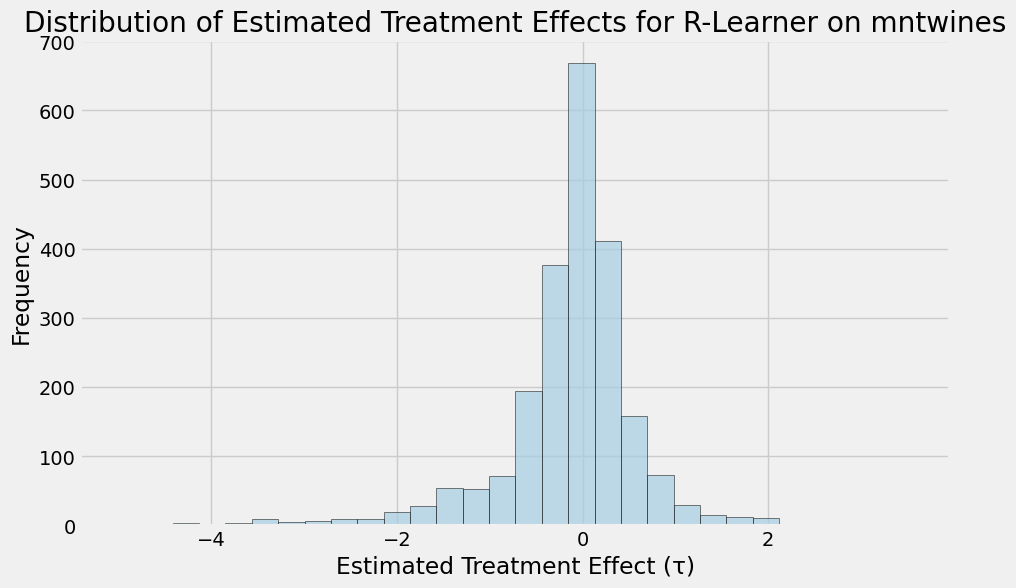

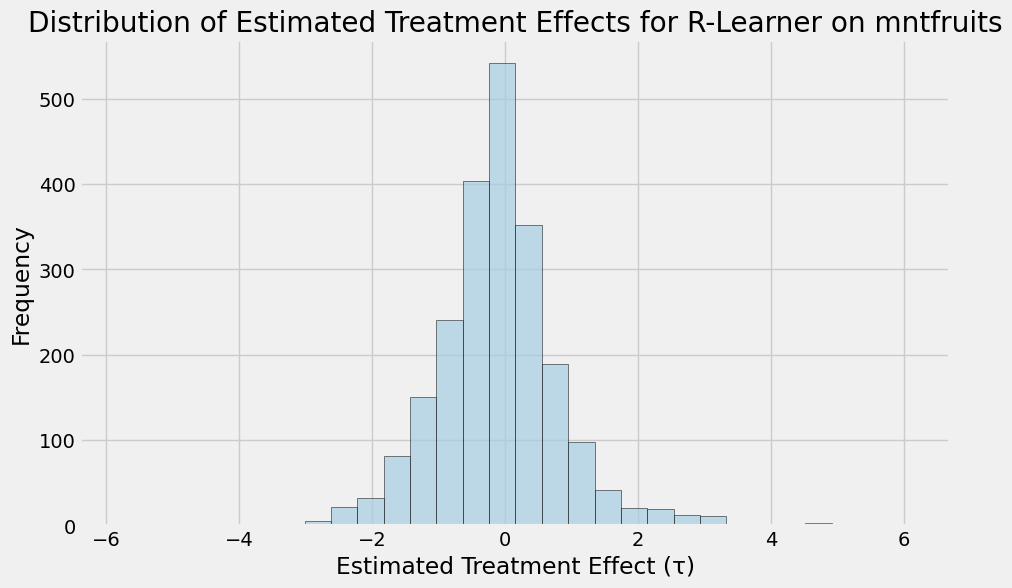

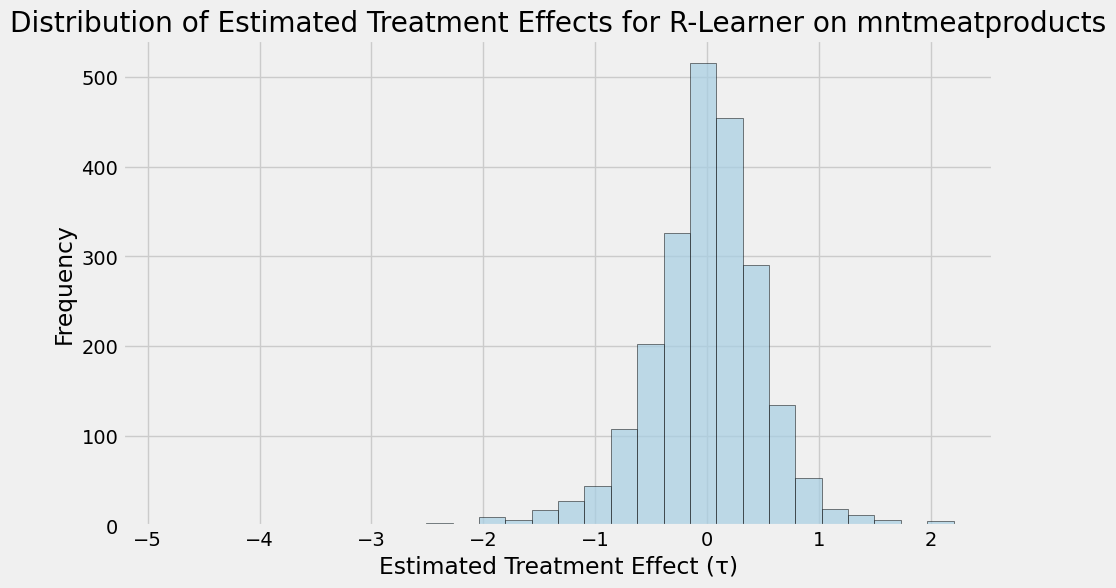

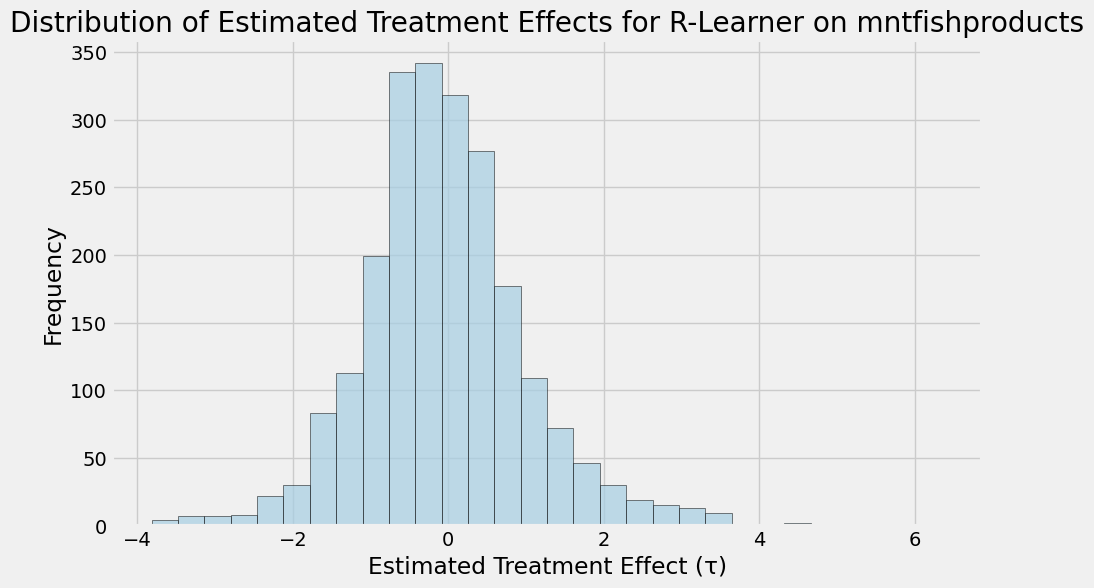

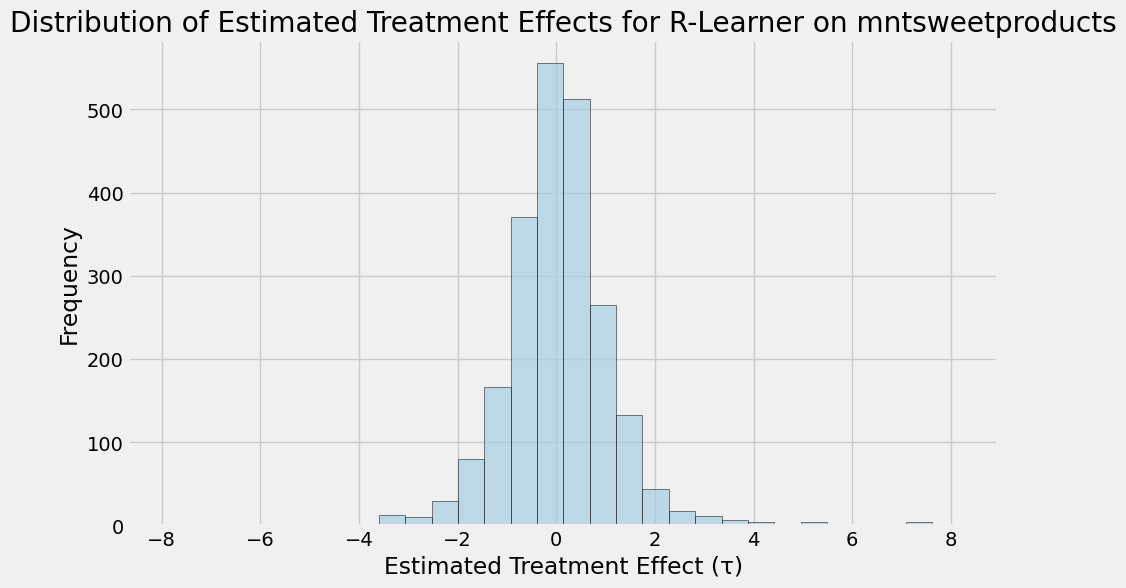

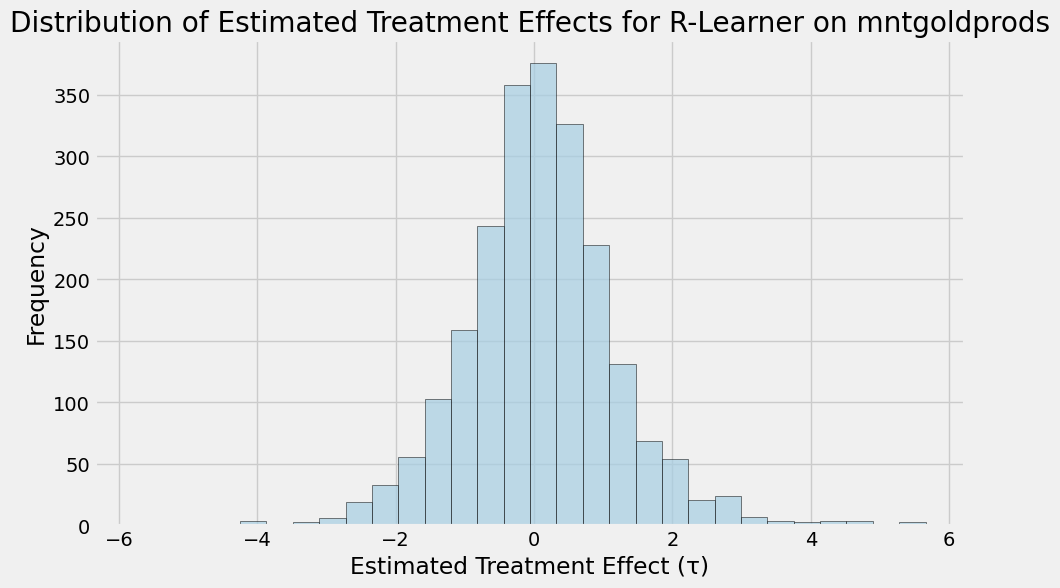

In [25]:
# Iterate over each row in the results DataFrame
for idx, row in results_df.iterrows():
    r_learner_model = row["r_learner"]
    tau_estimates = row["tau"]

    # Plot the distribution of tau estimates
    plt.figure(figsize=(10, 6))
    plt.hist(tau_estimates, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Distribution of Estimated Treatment Effects for R-Learner on ' + row["target var"])
    plt.xlabel('Estimated Treatment Effect (τ)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


We see that the treatment effects are normaly distributed with the ATE centered around 0. To understand what makes the treatment effect vary we will take a look into the feature importance and SHAP values below:

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

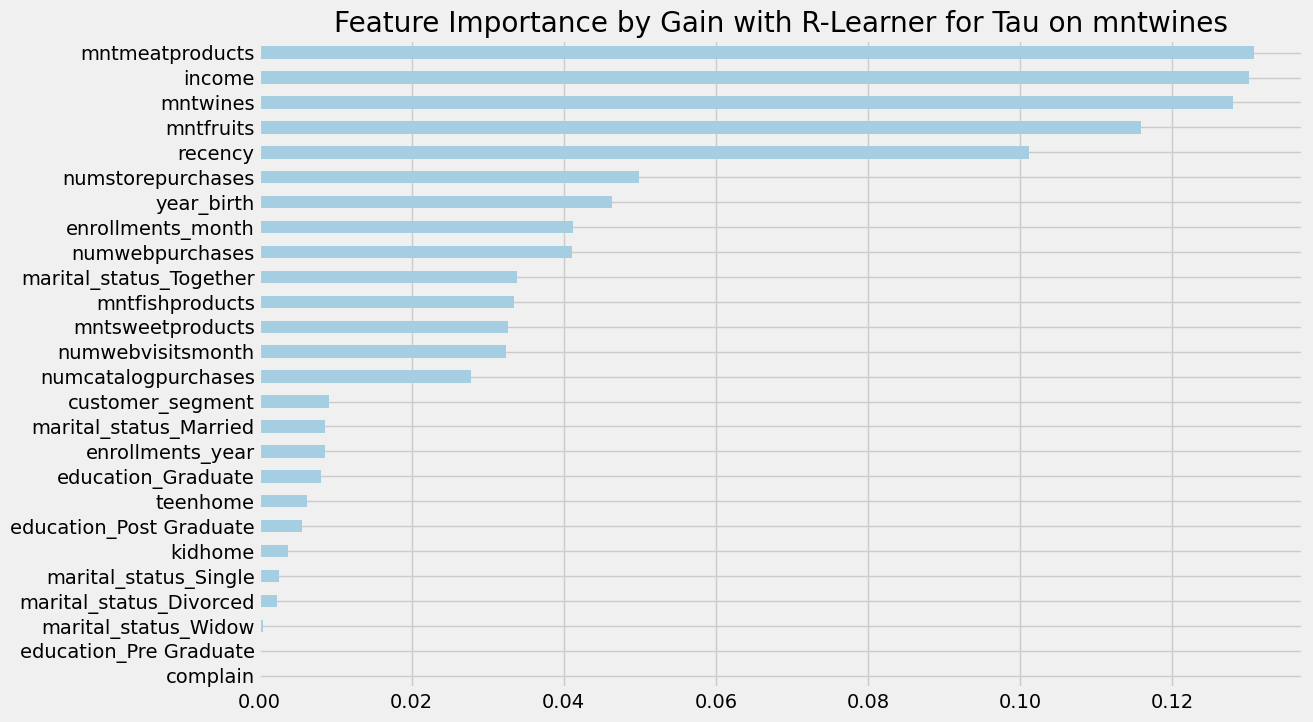

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

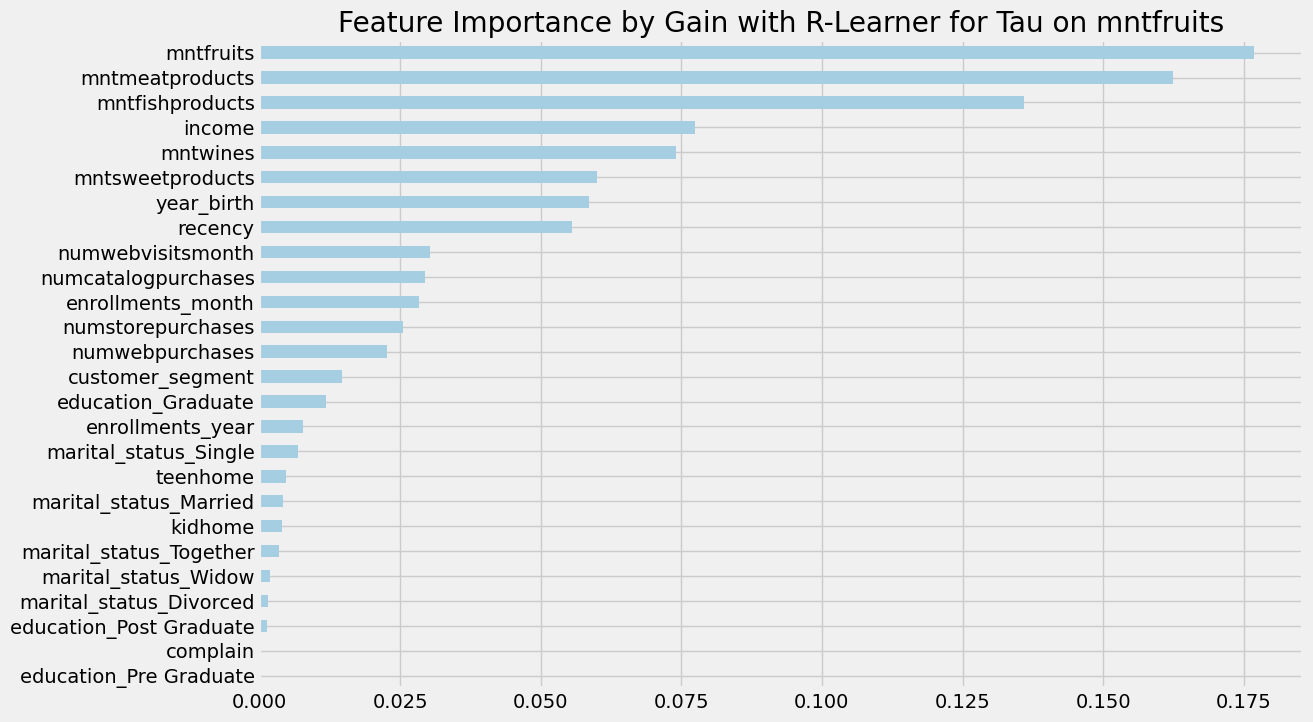

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

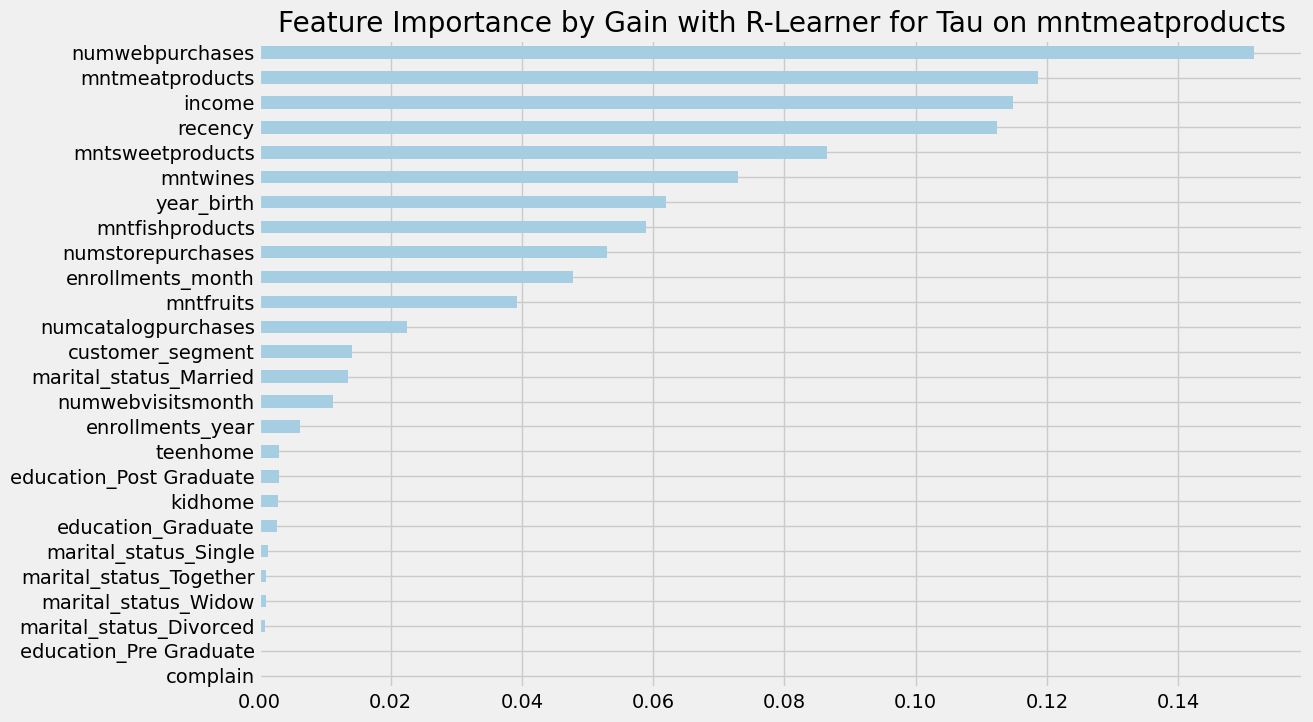

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

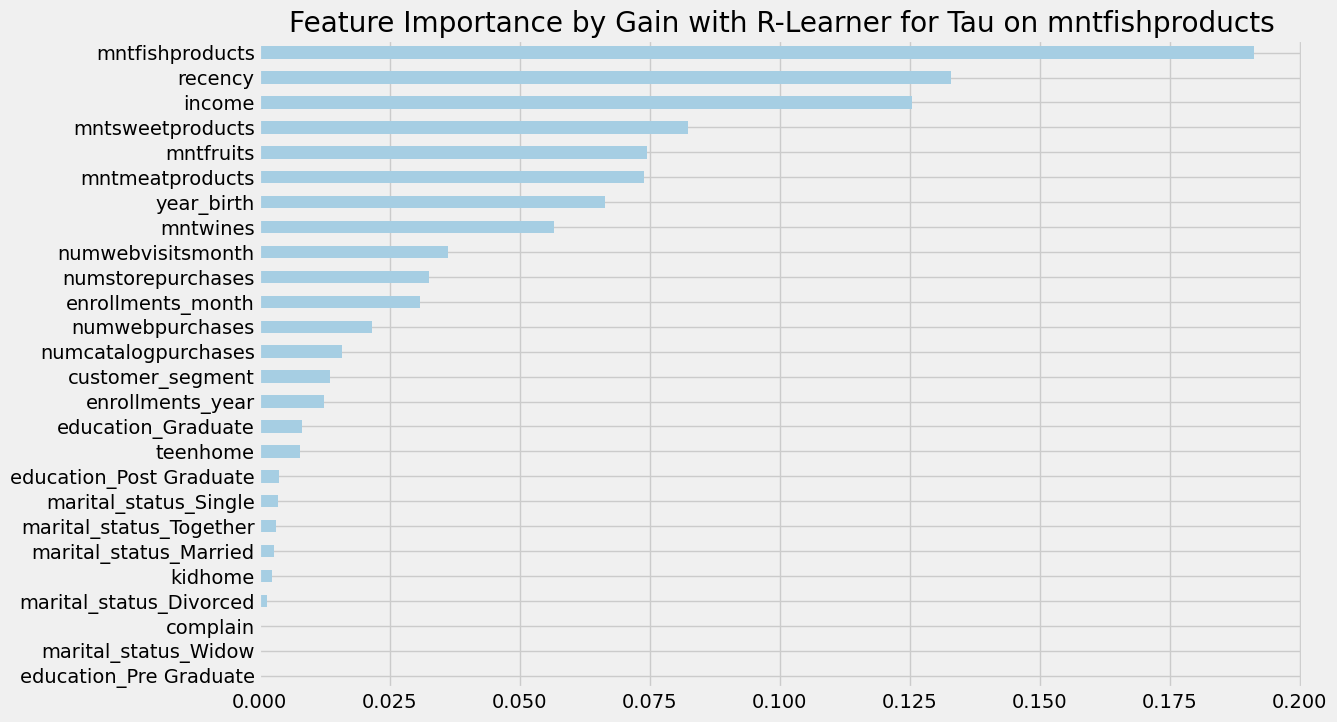

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

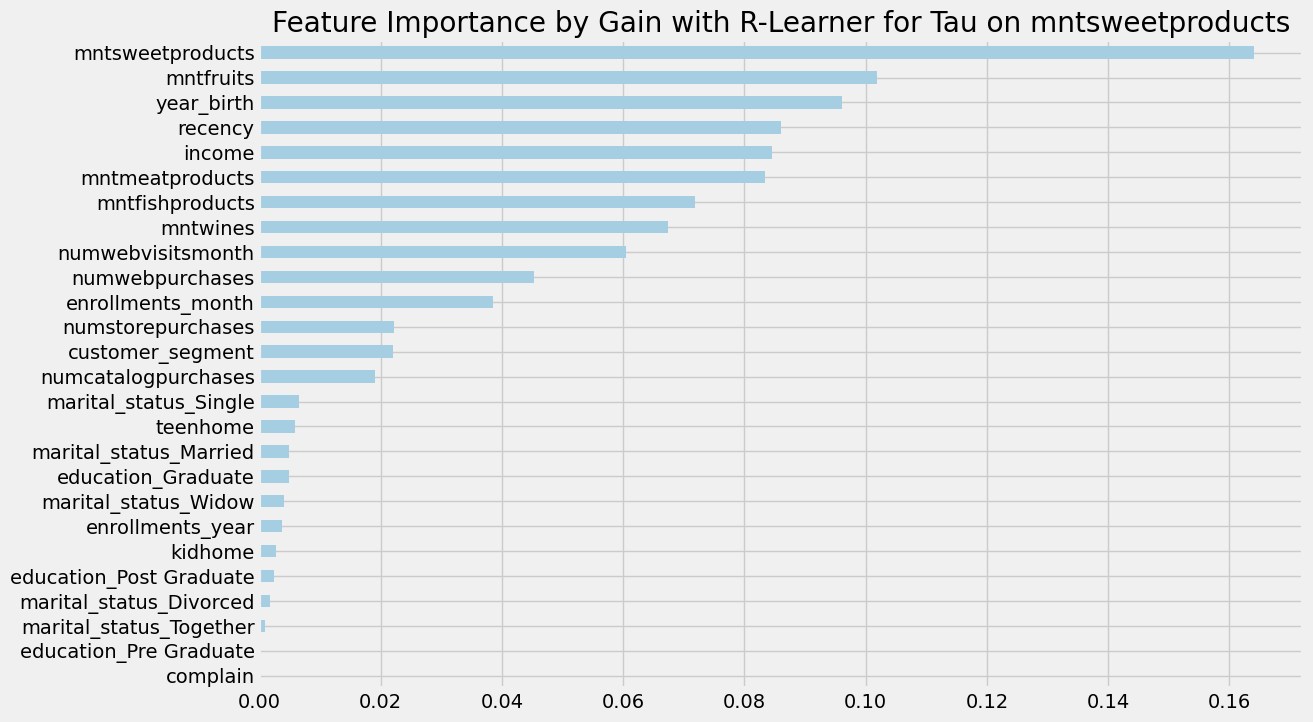

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

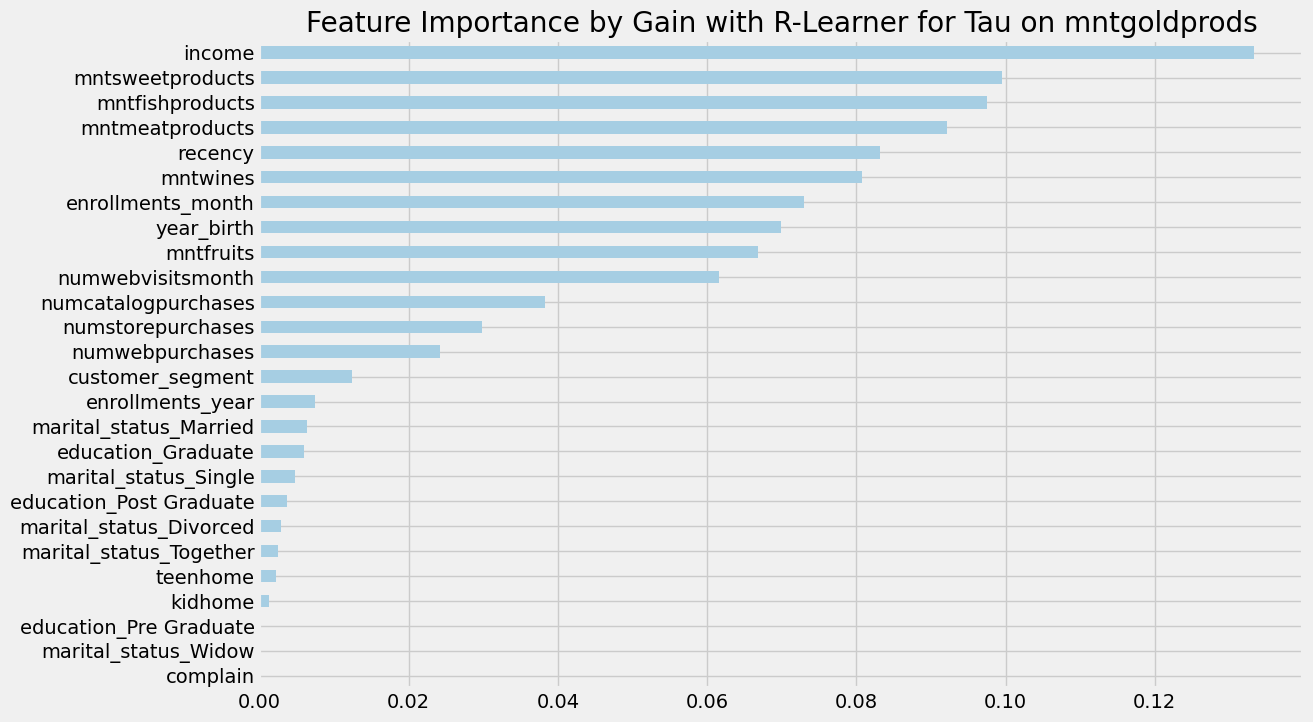

In [17]:
# Plot out the feature importance by gain for each of the language treatments
feature_names = X.columns
for idx, row in results_df.iterrows():
    r_learner_model = row["r_learner"]

    r_learner_model.plot_importance(X=X, tau=row["tau"], normalize=True, method="auto", features=feature_names)
    plt.title("Feature Importance by Gain with R-Learner for Tau on " + row["target var"])
    plt.show()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

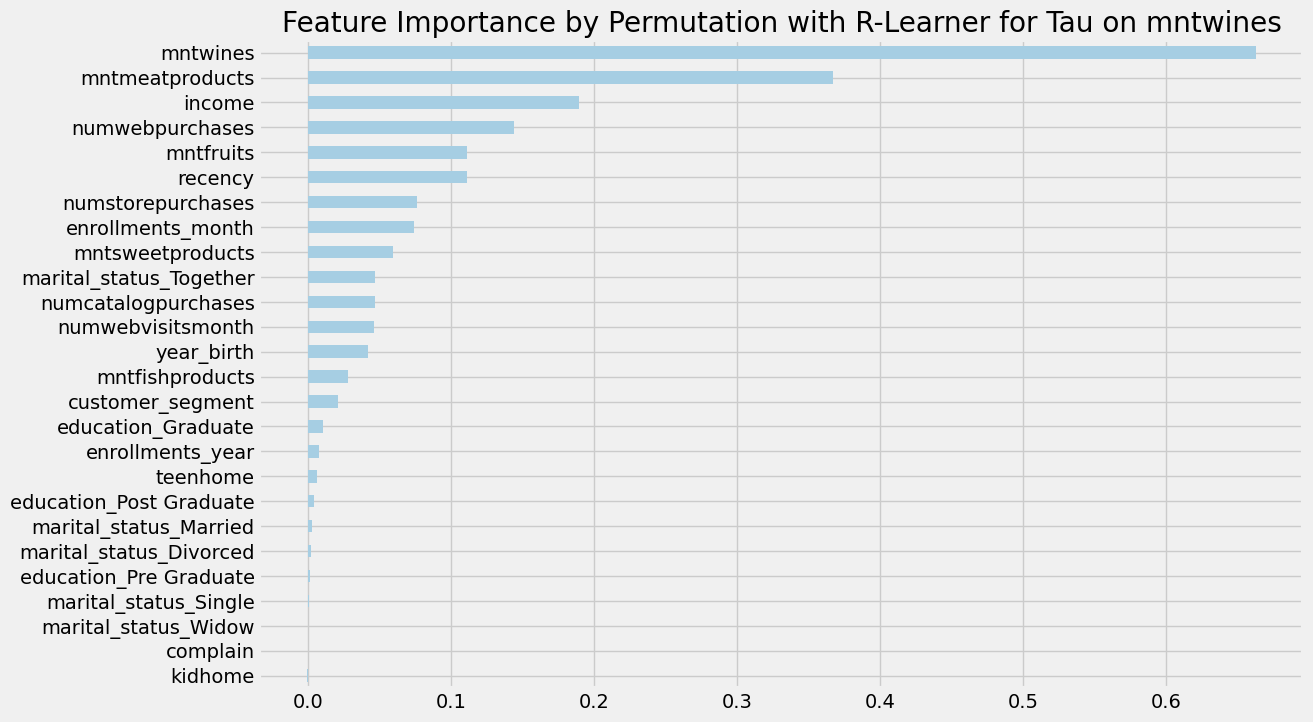

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

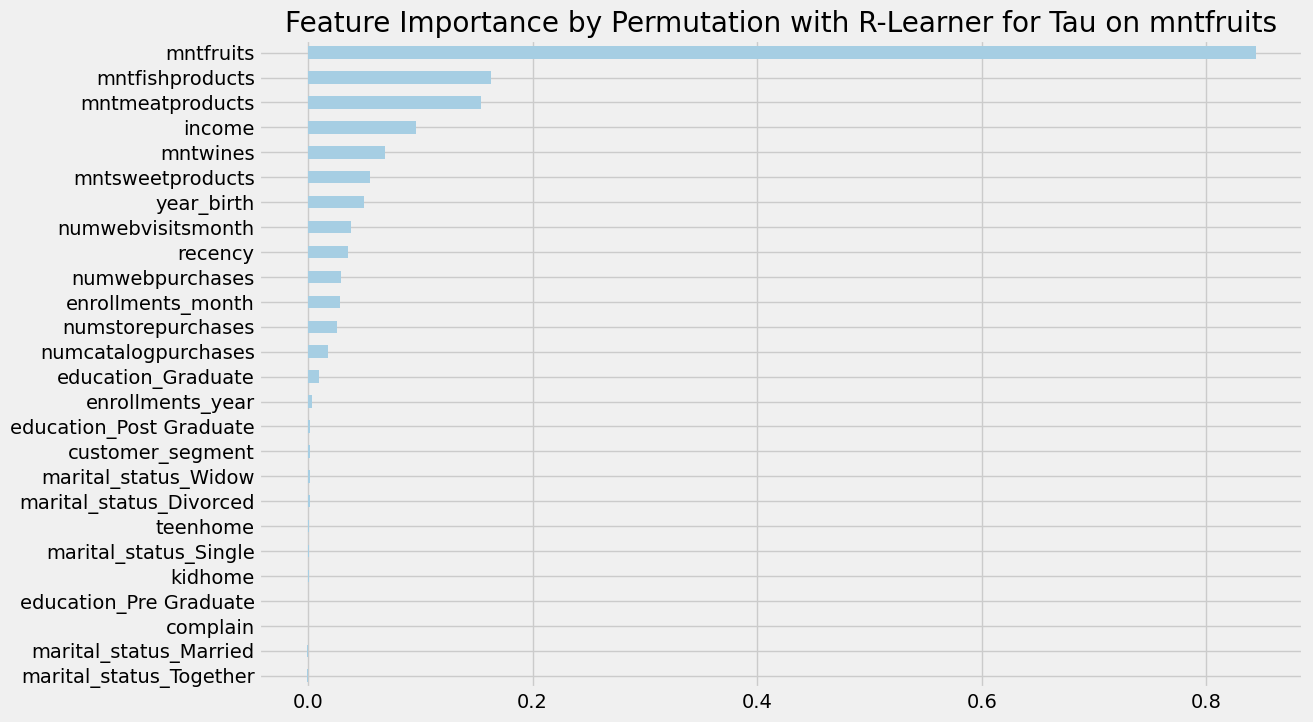

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

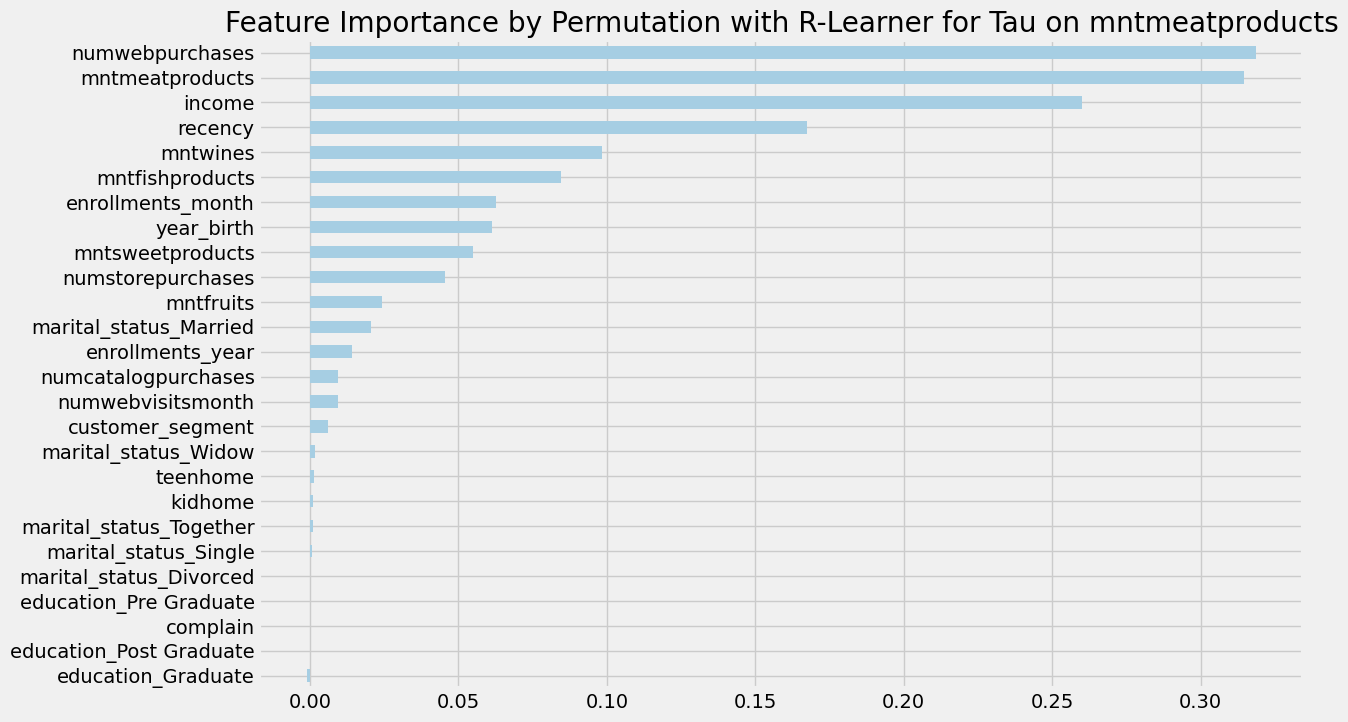

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

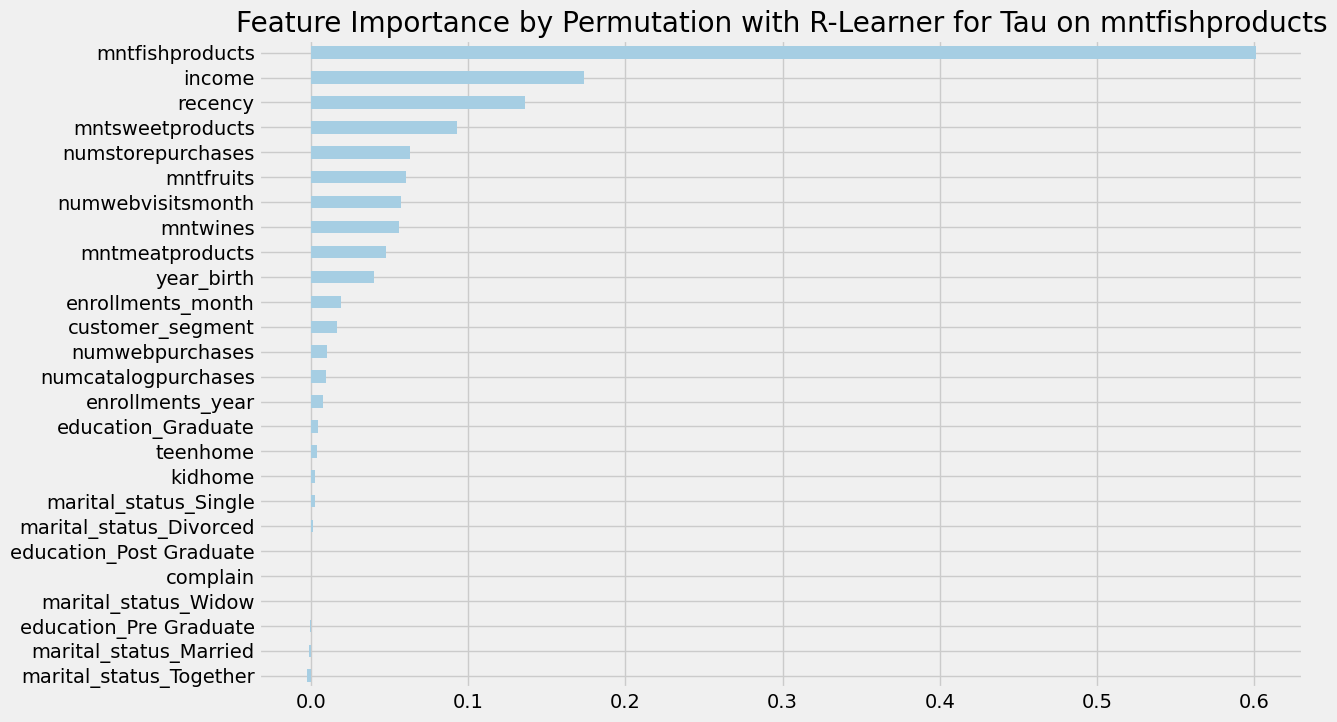

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

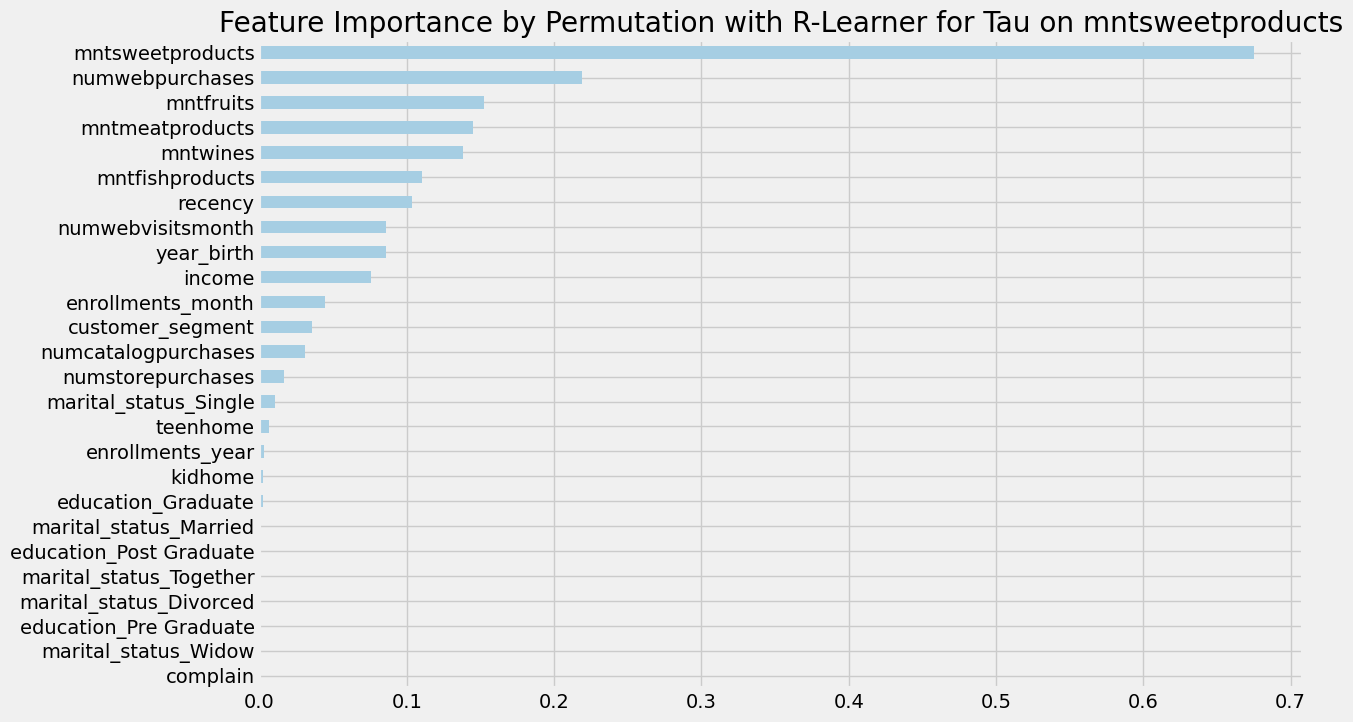

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

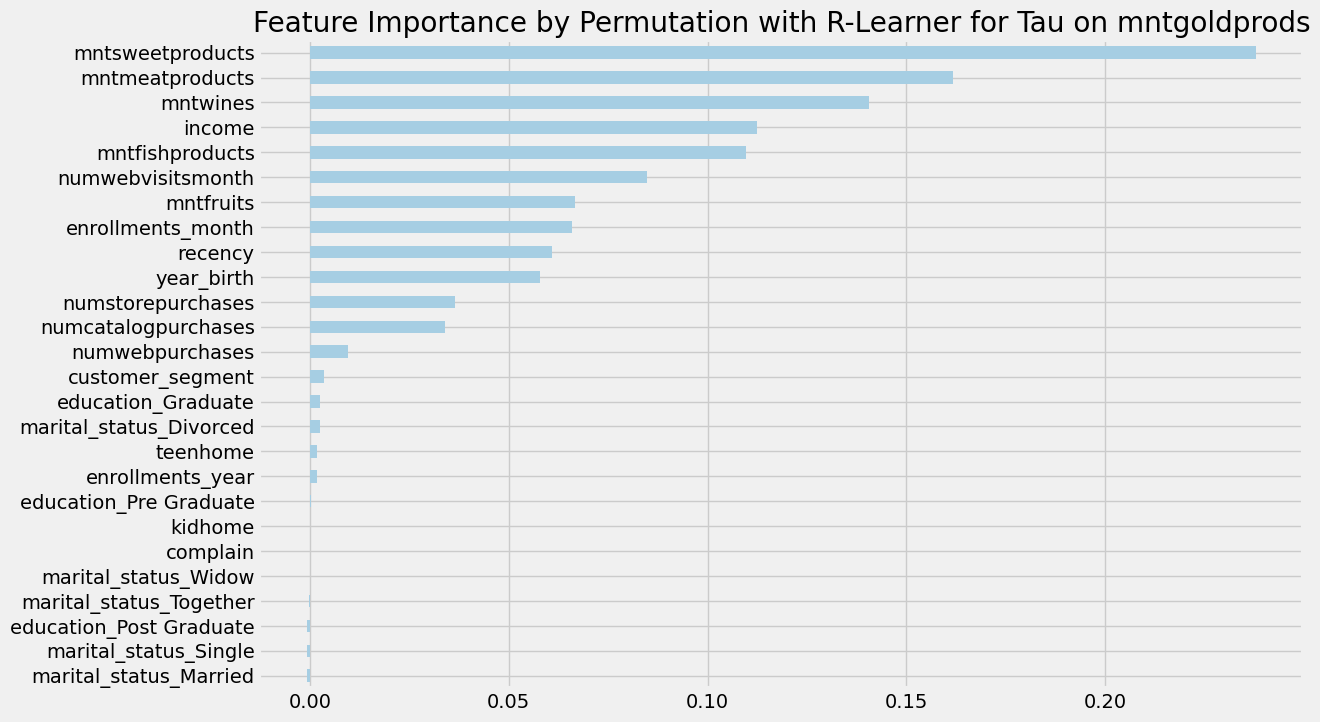

In [20]:
# Plot out the feature importance by permutation for each of the language treatments
feature_names = X.columns

for idx, row in results_df.iterrows():
    r_learner_model = row["r_learner"]

    r_learner_model.plot_importance(X=X, tau=row["tau"], normalize=True, method="permutation", features=feature_names)
    plt.title("Feature Importance by Permutation with R-Learner for Tau on " + row["target var"])
    plt.show()

Strongest importance by gain for tau with:
- mntwine: mntmeat, income, mntwines, mntfruits, recency
- mntfuriuts: mntfruits, mntmeat, mntfish
- mntmeat: numwebpurchases, mntmeat, income, recency
- mntfish: mntfish, recency, income
- mntsweet: mntsweet
- mntgold: income 

Strongest importance by permutation for tau with:
- mntwine: mntwine
- mntfuriuts: mntfruits
- mntmeat: mntmeat, numwebpurchases, income
- mntfish: mntfish
- mntsweet: mntsweet
- mntgold: mntsweet

When seeing which of the variables have the most importance when estimating the treatment effect we see that across the models, the target variable is almost always present and often the most important variable. 

The exception to this rule is the mntgold variable, this is surprising as we would expect for the target to be a crutial factor in determining the relationship between the target and the treatment. The most important variables are income when using gain, and mntsweet when using permutation. 

As for the control variables which show importance in determining the tau across the different models are: income, recency, numwebpurchases. We also see that when the different amount variables are included as confounders also show strong importance. 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

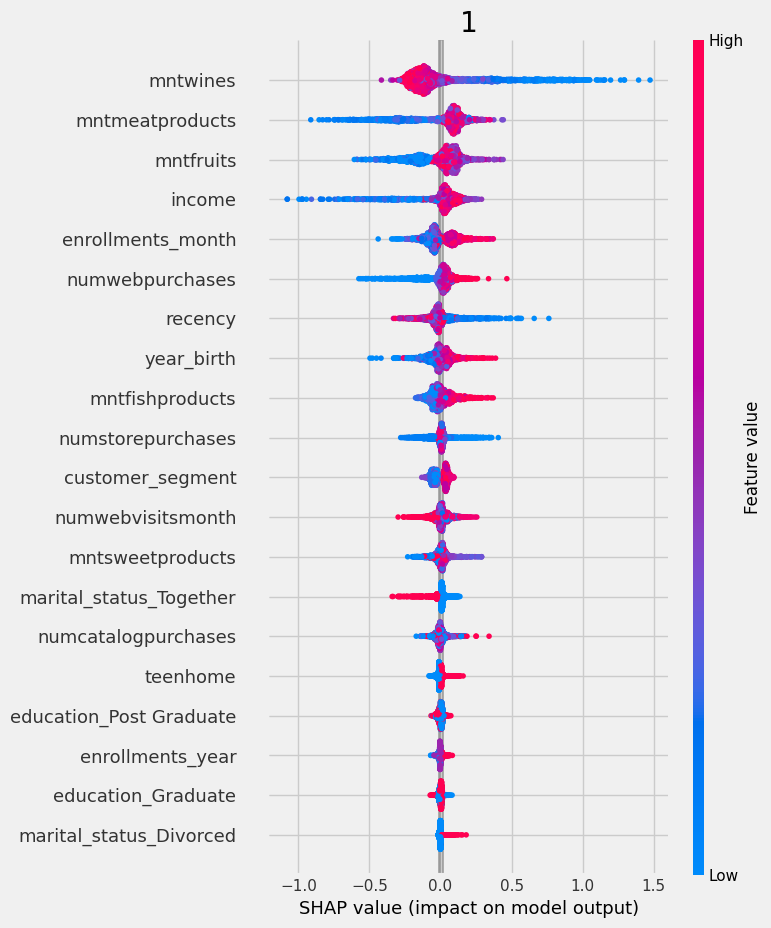

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

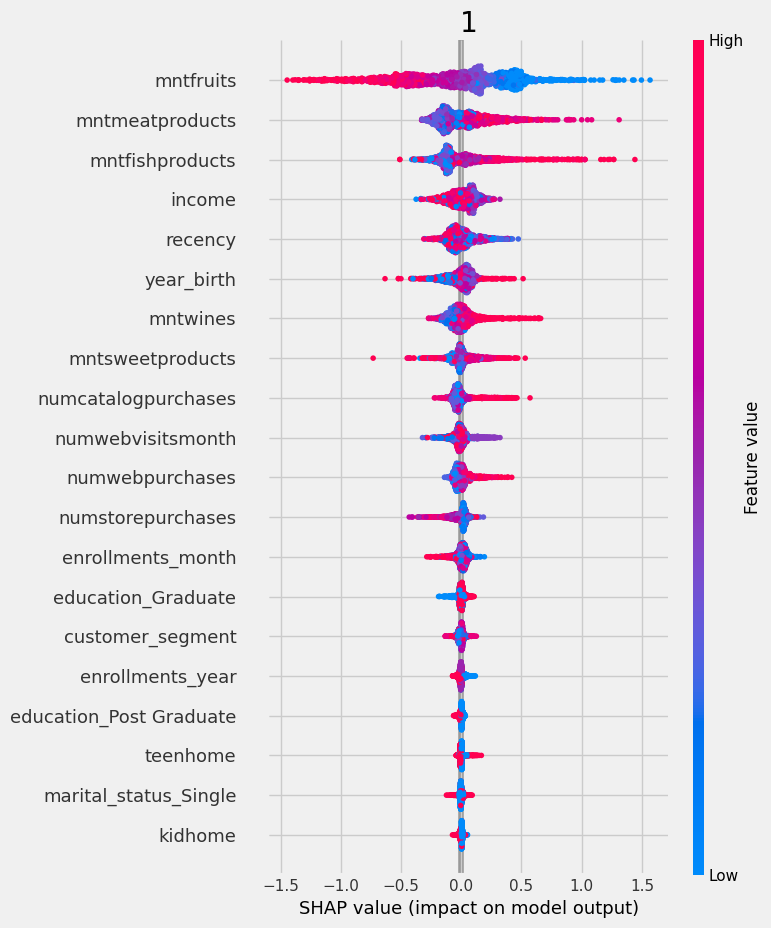

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

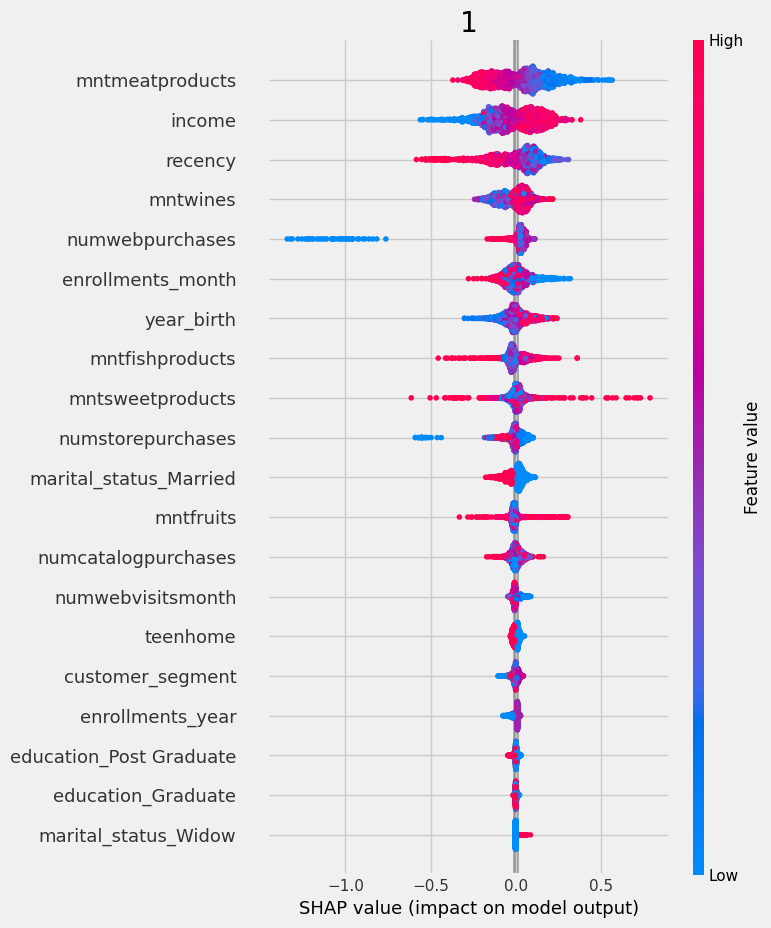

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

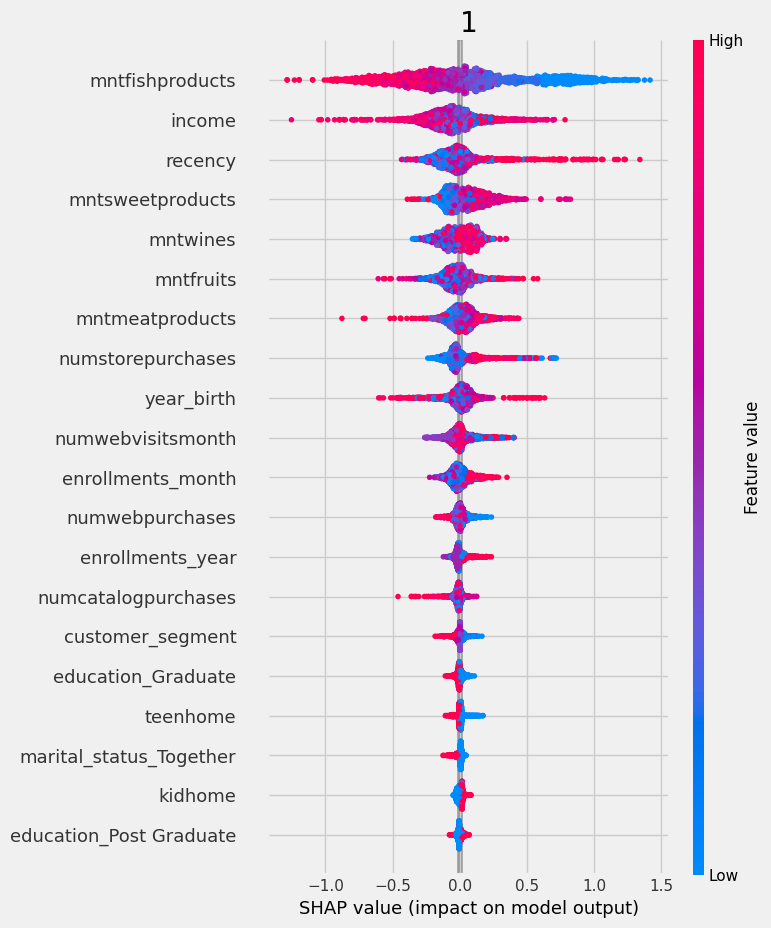

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

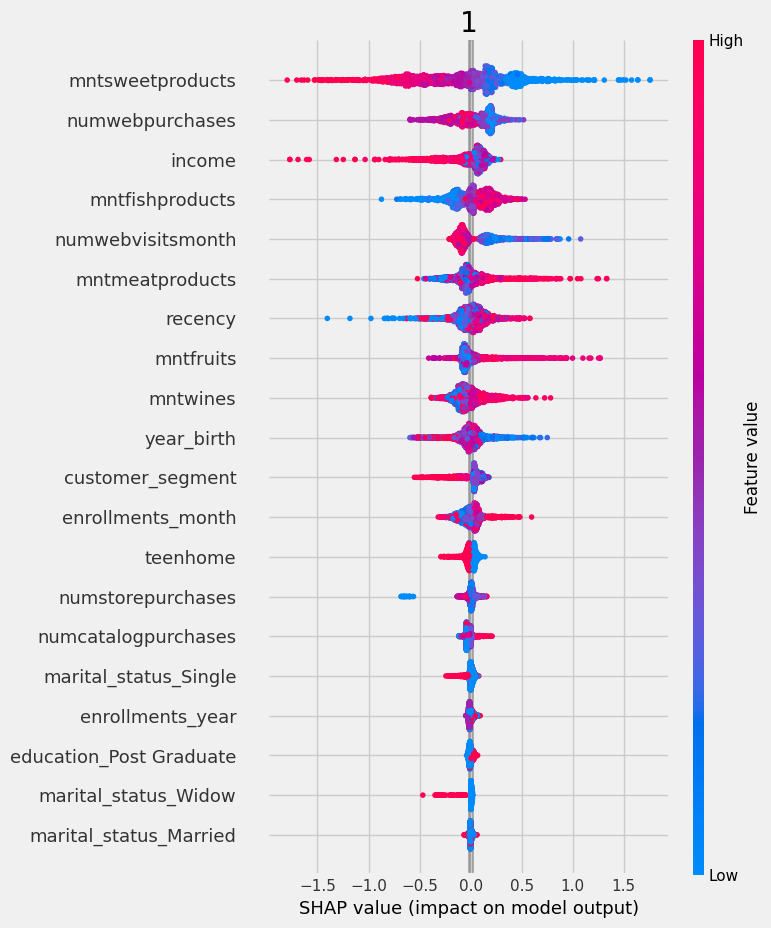

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

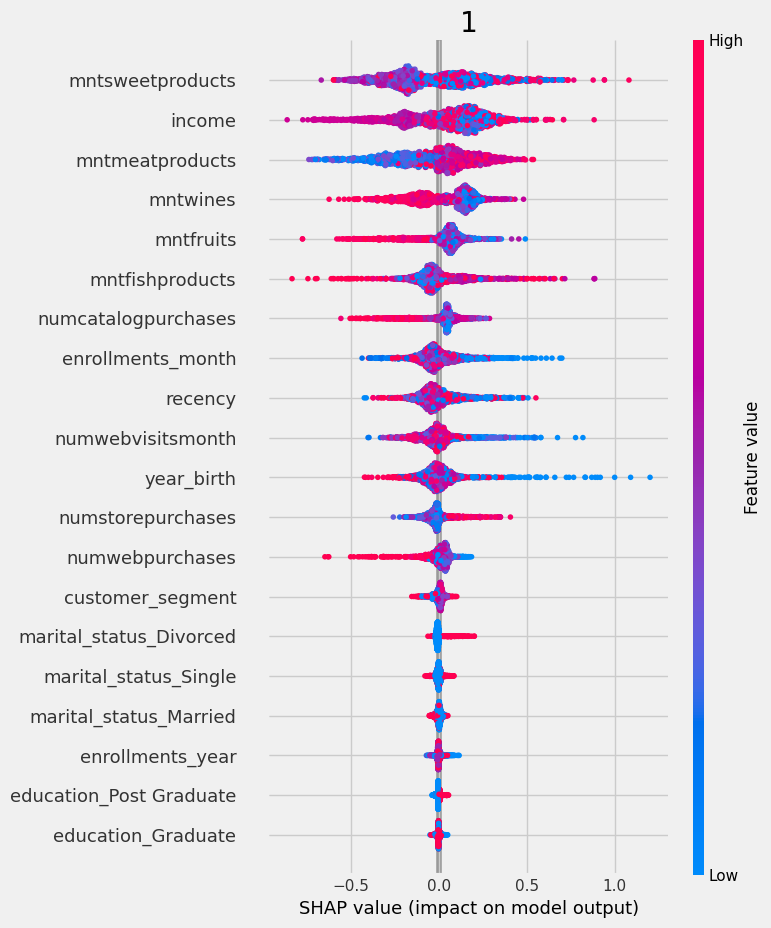

In [21]:
# Plot the shap values for the rlearner
feature_names = X.columns

for idx, row in results_df.iterrows():
    r_learner_model = row["r_learner"]

    r_learner_model.plot_shap_values(X=X, tau=row["tau"], features=feature_names)

Shap analysis for the treatment effect with Y:
- mntwine:  
	- mntwines: We see that the customers who buy larger amounts of wine have a smaller/negative tretment effect relative to those who buy smaller amounts of wine. Indicating that the campaign has a stronger effect on those who buy less wine normally.
	- mntmeat, mntfruits, income: For all of these variables we notice teh saem trend where smaller feature values are associated with negative treatement effects, and larger feature values with a smaller positive effect.
- mntfuriuts: 
	- mntfruits: We see that consumers who buy little amounts of fruits have a storng treatment effect and that the opposite is true for consumers who buy lots of fruits.
	- mntmeat, mntfish: we see that the treatment effect fo the campaign reponse on the amount of fruit baught is stronger when the feature value of the amount of meat and fish is high, when the feature value is small, they are associated with slightly negaitve tau.
- mntmeat: 
	- numwebpurchases: We see that the consumers who have the least amount of web purchases have a strong negative treatment effect, the rest are associated with treatment effects that near 0. 
	- mntmeat: customers who buy little meat generally have stronger treatment effects, the opposite is true for those who buy lots of meat regulary, compared to the other models we notice that there is more variablility and that the effect is smaller
	- income: Larger incomes are associated with larger treatment effects, the opposite is true, where we see smaller incomes being associated with negative values
	- recency: Customers who have had their last purcahse long ago see to have stronger negative treatement effects, while those who have had their last purchase more recently have smaller positive values. 
- mntfish: 
	- mntfish: We see that consumers who buy little amounts of fruits have a storng treatment effect and that the opposite is true for consumers who buy lots of fruits
	- recency: There is a lot of variablility with small and medium sized features around 0. However we distinguish that the customers who have had their last purchace the longest time ago are associated with stronger positive treatment effects. 
	- income: There is a lot of variablility, we distinguish an aglomeration of values at 0, we notice that customers with larger incomes have greater magnitude in their shap values, both positive and negative. 
	relative to the other models this one seems to have mre variablility in the realtionship between the treatment effect and the varaibles
- mntsweet:
	- mntsweet: We see that consumers who buy little amounts of sweets have a storng treatment effect and that the opposite is true for consumers who buy lots of sweets
- mntgold: 
	- mntsweet, income: For both these freautres we see lots of variablility between the different feture values and the tretment effects, relative to the other models these values are smaller in magnitude. 

## Generall conclusion for shap:

For each of the different product categories, the marketing campaign is associated with bigger purchases by customers who don't usually buy a lot of these products. In other words, customers who respond ot the campaign tend to buy more products which they don't have the habit of buying regularly. 

This is mostly true for the sweet, fish, fruit, and wine products as they have larger ranger of treatment effect.

We also notice that for the customers who usually buy a lot of a product category, will have as a response to the campagne the opposit effect, and be associated with smaller treatment effects for that category. When considering this, we could consider that the campagn makes consumers want to try to buy different things instead of their usual purchases. The exception to this would be the wine category, where the bigger wine consumers have smaller associated tretment effects, indicating that their ususal wine purchases are likely to stay the same. 

However when the product categories are used as control in the other models, larger amounts are associated with positive treatement effects, and smaller amounts with negative values. Considering the strong correlation between all product categories, I would interpret this as customers who buy larger amounts are associted with larger treatment effects. 

The exception to this rule is the gold products where it is harder to decipher as itself is not one of the top predictors of the tretment effect and has much more variability acorss its top predictors with patterns that don't comply to the previous observations. From my understanding of this dataset and form the analysis, the gold products are probaly some sort of products which are on discount amongst many other categories making it harder to decipher the exact purchasing patern of this category. My intuition is telling me we are missing informaiton to correctly understand what is the causal relationship between the response to the campagne and the gold products. 